In [2]:
#run before presentation
include("math405.jl")

# for only head title
## for section
### for subsection
#### for subsubsection

#An important technique to accelerate convergence of sequences. 
#Introduce extrapolation in general, specifically Richardson, give examples of use-case. 

# Richardson Extrapolation

by Group 4 (Ivan Gao, Lauryn Cheung, Davis Johnson)

## Extrapolation vs Interpolation

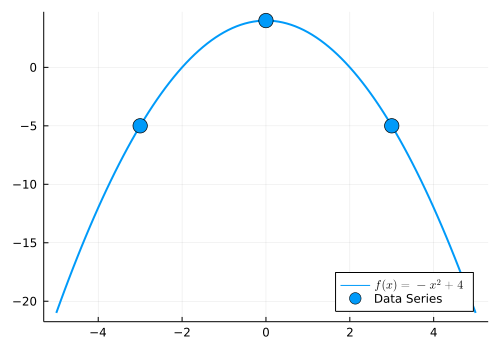

In [14]:
f = x-> -x^2 + 4
xx = -3:3:3
X = -5:0.1:5

plot(X, f.(X), lw=2, label = L"f(x) = -x^2 + 4", size=(500, 350), legend=:bottomright)
scatter!(xx, f.(xx), ms=8, c=1, label="Data Series")

**Interpolation** refers to estimating a value within two known values that exist within a sequence of values.

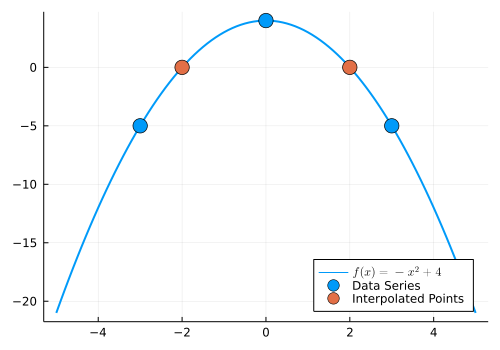

In [15]:
xi = -2:4:2

plot(X, f.(X), lw=2, label = L"f(x) = -x^2 + 4", size=(500, 350), legend=:bottomright)
scatter!(xx, f.(xx), ms=8, c=1, label="Data Series")
scatter!(xi, f.(xi), ms=8, c=2, label="Interpolated Points")

**Extrapolation** refers to estimating an unknown value based on extending a known sequence of values or facts. 

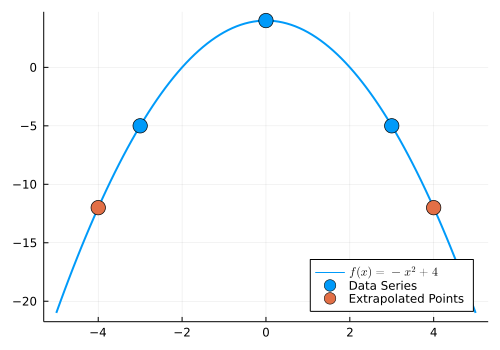

In [16]:
xe = -4:8:4

plot(X, f.(X), lw=2, label = L"f(x) = -x^2 + 4", size=(500, 350), legend=:bottomright)
scatter!(xx, f.(xx), ms=8, c=1, label="Data Series")
scatter!(xe, f.(xe), ms=8, c=2, label="Extrapolated Points")

### What is the value of Extrapolation?

We can understand results beyond an observable region. 
Compared to interpolation, there is a greater risk of incurring errors.

### So what is Richardson Extrapolation?

Recall using Taylor Series we can create approximations such as the center difference formula with a step size $h$:

$$
    \frac{f(x+h) - f(x-h)}{2h} \approx f'(x)
$$

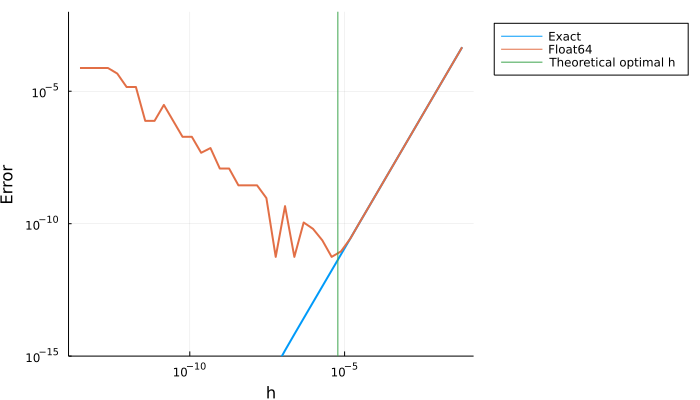

In [34]:
using Plots 

e64 = eps(Float64)
ctrl64 = cbrt(e64)

hh = 0.5.^(4:45)
f = x -> cos(x); df = x -> - sin(x); x0 = pi/4  
err_ex = [ abs((f(big(x0+h)) - f(big(x0-h)))/(2*big(h)) - df(x0)) for h in hh ]
err_fl = [ abs((f(x0+h) - f(x0-h))/(2*h) - df(x0)) for h in hh ]
plot(hh, err_ex, xaxis = :log, xlabel = "h", yaxis = :log, ylabel = "Error", lw = 2, label = "Exact", size = (700, 400), ylims = [1e-15, 1e-2], legend = :outertopright)
plot!(hh, err_fl, label = "Float64", lw = 2)
vline!([ctrl64], label = "Theoretical optimal h")

Observe that the error reduces as h does, up until a point where truncation errors begin to dominate. We can see that there is a value in trying to approximate our function when $h \approx 0$, while avoiding the range with truncation error. 

This motivates **Richardson Extrapolation**: using the values of several approximations $A(h)$ to an exact function $A^*$, we can extrapolate $A(0)$, which provides a higher order estimation of $A^*$

## Richardson Extrapolation

A sequence acceleration method used to improve the rate of convergence of a sequence of estimates of some value

Taylor expansion:

$$
    u(x+h) = u(x) + h u'(x) + \frac{h^2}{2} u''(x) + \frac{h^3}{6} u'''(x) + \frac{h^4}{24} u^{(iv)}(\xi)
$$

drop $O(h^2)$ gives:

$$
u(x+h) = u(x) + hu'(x)
$$

## Application:

### The Romberg Integration
which applies Richardson extrapolation to the trapezoid rule.

### The Bulirsch–Stoer Algorithm
for solving ordinary differential equations.

### The Romberg Integration

### The Bulirsch–Stoer Algorithm

#### ref

https://en.wikipedia.org/wiki/Richardson_extrapolation

https://sites.math.washington.edu/~greenbau/Math_498/lecture04_richardson.pdf

https://math.berkeley.edu/~mgu/MA128ASpring2017/MA128ALectureWeek6.pdf

https://personal.math.ubc.ca/~feldman/m256/richard.pdf